In [55]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [62]:
# Define path to netCDF file to open and read
hcho_fp = './TEMPO_20130704_17h_LA1_HCHO.nc'
o3_fp = './TEMPO_20130704_17h_LA1_O3.nc'
la_rtm_fp = './TEMPO_20130704_17h_LA1_rtm.nc'

# Open the file. I like to do it using with to guarantee
# that it will be closed after we are done reading
# netCDF files are organized in group (which can have subgroups)
# and data fields. Each group or data field can have attributes.
# The file as a whole can also have attributes that in this case
# are called global attributes. Following this example and reading
# https://unidata.github.io/netcdf4-python/ you should get some
# familiarity about how to work with them
with Dataset(hcho_fp,'r') as hcho_src, Dataset(o3_fp, 'r') as o3_src, Dataset(la_rtm_fp) as la_src:
    # Read geolocation variables
    common_src = hcho_src


    lat = common_src['geolocation']['latitude'][:]
    lon = common_src['geolocation']['longitude'][:]
    terrain_height = common_src['geolocation']['terrain_height'][:]
   
    solar_zenith_angle = common_src['geolocation']['solar_zenith_angle'][:]
    viewing_zenith_angle = common_src['geolocation']['viewing_zenith_angle'][:]
    relative_azimuth_angle = common_src['geolocation']['relative_azimuth_angle'][:]
    
    surface_pressure = common_src['geolocation']['surface_pressure'][:]
    tropopause_pressure = common_src['geolocation']['tropopause_pressure'][:]

    albedo = common_src['support_data']['albedo'][:]

    # hcho_gas_profile = hcho_src['support_data']['gas_profile'][:]
    # o3_gas_profile = o3_src['support_data']['gas_profile'][:]
    air_partial_col = la_src['Profile']['AirPartialColumn'][:]


    Ar_gas_mixing_ratio = la_src['Profile']['Ar_GasMixingRatio'][:]
    BrO_gas_mixing_ratio = la_src['Profile']['BrO_GasMixingRatio'][:]
    CO2_gas_mixing_ratio = la_src['Profile']['CO2_GasMixingRatio'][:]
    GLYX_gas_mixing_ratio = la_src['Profile']['GLYX_GasMixingRatio'][:]
    H2O_gas_mixing_ratio = la_src['Profile']['H2O_GasMixingRatio'][:]
    HCHO_gas_mixing_ratio = la_src['Profile']['HCHO_GasMixingRatio'][:]
    N2_gas_mixing_ratio = la_src['Profile']['N2_GasMixingRatio'][:]
    NO2_gas_mixing_ratio = la_src['Profile']['NO2_GasMixingRatio'][:]
    O2_gas_mixing_ratio = la_src['Profile']['O2_GasMixingRatio'][:]
    O3_gas_mixing_ratio = la_src['Profile']['O3_GasMixingRatio'][:]
    SO2_gas_mixing_ratio = la_src['Profile']['SO2_GasMixingRatio'][:]

    Ar_amf = la_src['RTM_Band1']['Ar_AMF'][:]
    BrO_amf = la_src['RTM_Band1']['BrO_AMF'][:]
    CO2_amf = la_src['RTM_Band1']['CO2_AMF'][:]
    GLYX_amf = la_src['RTM_Band1']['GLYX_AMF'][:]
    H2O_amf = la_src['RTM_Band1']['H2O_AMF'][:]
    HCHO_amf = la_src['RTM_Band1']['HCHO_AMF'][:]
    N2_amf = la_src['RTM_Band1']['N2_AMF'][:]
    NO2_amf = la_src['RTM_Band1']['NO2_AMF'][:]
    O2_amf = la_src['RTM_Band1']['O2_AMF'][:]
    O3_amf = la_src['RTM_Band1']['O3_AMF'][:]
    SO2_amf = la_src['RTM_Band1']['SO2_AMF'][:]

    hcho_gas_profile = hcho_src['true_quantities']['gas_profile'][:]
    
    # hcho_col = hcho_src['product']['column_amount'][:]
    # o3_col = o3_src['product']['column_amount'][:]

    # amf_g = common_src['support_data']['amf_geometric'][:]
    # albedo = common_src['support_data']['albedo'][:]

    # hcho_vert_col = amf_g.filled(amf_g.mean()) * hcho_col
    # o3_vert_col = amf_g.filled(amf_g.mean()) * o3_col


<class 'netCDF4._netCDF4.Group'>
group /Profile:
    dimensions(sizes): 
    variables(dimensions): float32 AirPartialColumn(lmx, jmx, imx), float32 N2_GasMixingRatio(lmx, jmx, imx), float32 O2_GasMixingRatio(lmx, jmx, imx), float32 Ar_GasMixingRatio(lmx, jmx, imx), float32 CO2_GasMixingRatio(lmx, jmx, imx), float32 O3_GasMixingRatio(lmx, jmx, imx), float32 NO2_GasMixingRatio(lmx, jmx, imx), float32 HCHO_GasMixingRatio(lmx, jmx, imx), float32 BrO_GasMixingRatio(lmx, jmx, imx), float32 GLYX_GasMixingRatio(lmx, jmx, imx), float32 SO2_GasMixingRatio(lmx, jmx, imx), float32 H2O_GasMixingRatio(lmx, jmx, imx)
    groups: 


C:\Users\wasii\AppData\Local\Temp/ipykernel_23704/1734473115.py:61: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  hcho_gas_profile = hcho_src['true_quantities']['gas_profile'][:]
C:\Users\wasii\AppData\Local\Temp/ipykernel_23704/1734473115.py:61: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  hcho_gas_profile = hcho_src['true_quantities']['gas_profile'][:]


RuntimeError: NetCDF: Not a valid ID

In [3]:
Ar_gas_mixing_ratio.shape

(20, 20, 61)

In [4]:
def norm_val(val):
    return (val - val.mean())/val.std()


In [5]:
Ar_gas_mixing_ratio.shape

(20, 20, 61)

In [6]:
Ar_slant_col = np.sum(Ar_gas_mixing_ratio * air_partial_col, axis=0) * Ar_amf
BrO_slant_col = np.sum(BrO_gas_mixing_ratio * air_partial_col, axis=0) * BrO_amf
GLYX_slant_col = np.sum(GLYX_gas_mixing_ratio * air_partial_col, axis=0) * GLYX_amf
H2O_slant_col = np.sum(H2O_gas_mixing_ratio * air_partial_col, axis=0) * H2O_amf
HCHO_slant_col = np.sum(HCHO_gas_mixing_ratio * air_partial_col, axis=0) * HCHO_amf
N2_slant_col = np.sum(N2_gas_mixing_ratio * air_partial_col, axis=0) * N2_amf
NO2_slant_col = np.sum(NO2_gas_mixing_ratio * air_partial_col, axis=0) * NO2_amf
O2_slant_col = np.sum(O2_gas_mixing_ratio * air_partial_col, axis=0) * O2_amf
O3_slant_col = np.sum(O3_gas_mixing_ratio * air_partial_col, axis=0) * O3_amf
SO2_slant_col = np.sum(SO2_gas_mixing_ratio * air_partial_col, axis=0) * SO2_amf

In [7]:
HCHO_slant_col.mean()

1.1178716e+16

In [8]:
H2O_slant_col.mean()

1.3110776e+23

In [9]:
hcho_gas_profile.shape

(20, 20, 61)

In [10]:
transform_func = np.log

In [11]:
np.min(tropopause_pressure)

139.96584

(array([  5.,  12.,  30.,  49.,  46.,  49.,  80., 123., 200., 626.]),
 array([3.0058296e+23, 3.0640164e+23, 3.1222037e+23, 3.1803909e+23,
        3.2385778e+23, 3.2967646e+23, 3.3549519e+23, 3.4131391e+23,
        3.4713260e+23, 3.5295128e+23, 3.5877000e+23], dtype=float32),
 <BarContainer object of 10 artists>)

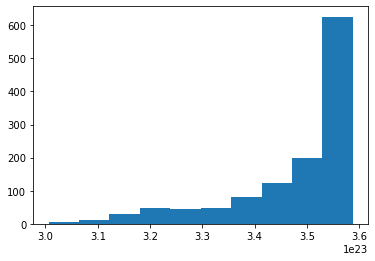

In [12]:
plt.hist(Ar_slant_col[0].flatten())

(array([  2.,   0.,   1.,   1.,   1.,   1.,   2.,   1.,   4.,   4.,   9.,
          5.,   5.,   6.,  10.,   6.,  15.,  11.,   7.,  10.,   9.,  11.,
          8.,   8.,  13.,   2.,   7.,  12.,   8.,   8.,  10.,   9.,  12.,
         15.,  13.,  18.,  21.,  26.,  38.,  20.,  33.,  16.,  20.,  13.,
         18.,  34.,  58.,  50., 144., 465.]),
 array([ 820.4017 ,  824.094  ,  827.78625,  831.4786 ,  835.17084,
         838.86316,  842.5555 ,  846.24774,  849.94006,  853.6324 ,
         857.32465,  861.01697,  864.7092 ,  868.40155,  872.0939 ,
         875.78613,  879.47845,  883.1708 ,  886.86304,  890.55536,
         894.2476 ,  897.93994,  901.63226,  905.3245 ,  909.01685,
         912.7091 ,  916.4014 ,  920.09375,  923.786  ,  927.47833,
         931.17065,  934.8629 ,  938.55524,  942.2475 ,  945.9398 ,
         949.63214,  953.3244 ,  957.0167 ,  960.70905,  964.4013 ,
         968.0936 ,  971.7859 ,  975.4782 ,  979.17053,  982.8628 ,
         986.5551 ,  990.24744,  993.9397 ,  9

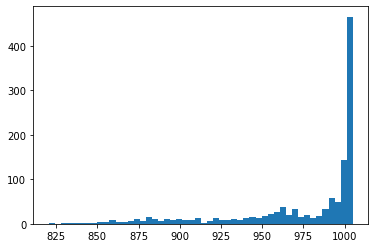

In [83]:
plt.hist(surface_pressure.flatten(), bins=50)

(array([  2.,   0.,   1.,   1.,   0.,   1.,   1.,   2.,   3.,   2.,   6.,
          7.,   5.,   5.,   6.,  10.,   6.,  13.,  10.,   8.,   6.,  12.,
         12.,   7.,   8.,  12.,   6.,   3.,  16.,   7.,   8.,  11.,   6.,
         13.,  16.,  14.,  19.,  21.,  26.,  42.,  23.,  30.,  16.,  19.,
         19.,  30.,  54.,  57., 125., 493.]),
 array([6.709794 , 6.7138534, 6.7179127, 6.721972 , 6.7260313, 6.7300906,
        6.73415  , 6.7382092, 6.7422686, 6.746328 , 6.750387 , 6.7544465,
        6.758506 , 6.762565 , 6.7666245, 6.770684 , 6.774743 , 6.7788024,
        6.7828617, 6.786921 , 6.7909803, 6.7950397, 6.799099 , 6.8031583,
        6.8072176, 6.8112764, 6.8153358, 6.819395 , 6.8234544, 6.8275137,
        6.831573 , 6.8356323, 6.8396916, 6.843751 , 6.8478103, 6.8518696,
        6.855929 , 6.859988 , 6.8640475, 6.868107 , 6.872166 , 6.8762255,
        6.880285 , 6.884344 , 6.8884034, 6.8924627, 6.896522 , 6.9005814,
        6.9046407, 6.9087   , 6.9127593], dtype=float32),
 <BarCon

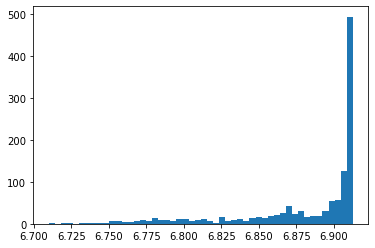

In [82]:
plt.hist(np.log(surface_pressure).flatten(), bins=50)

(array([  5.,  13.,  19.,  46.,  64., 234., 723.,  77.,  33.,   6.]),
 array([1.9074048e+19, 1.9328638e+19, 1.9583228e+19, 1.9837818e+19,
        2.0092407e+19, 2.0346999e+19, 2.0601589e+19, 2.0856179e+19,
        2.1110768e+19, 2.1365358e+19, 2.1619948e+19], dtype=float32),
 <BarContainer object of 10 artists>)

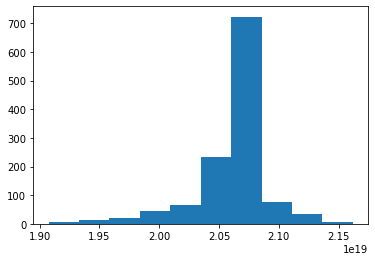

In [91]:
plt.hist(O3_slant_col[0].flatten())

(array([  4.,  11.,  19.,  40.,  61.,  91., 857.,  90.,  41.,   6.]),
 array([44.39486 , 44.407387, 44.419918, 44.432446, 44.444977, 44.457504,
        44.47003 , 44.482563, 44.49509 , 44.50762 , 44.52015 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

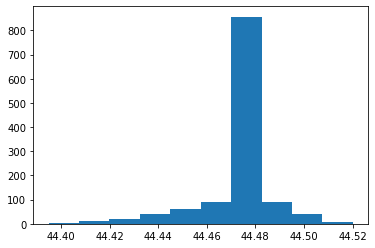

In [90]:
plt.hist(np.log(O3_slant_col[0]).flatten())

In [84]:
np.log(surface_pressure).var()

0.0018812149663900316

In [88]:
np.log(surface_pressure.var())

7.4176836

In [13]:
solar_zenith_angle.shape

(20, 61)

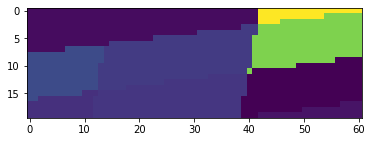

In [18]:
plt.imshow(albedo)

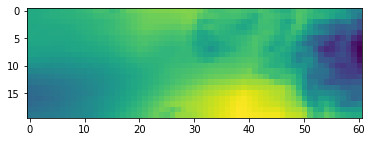

In [14]:
plt.imshow(H2O_slant_col[0])

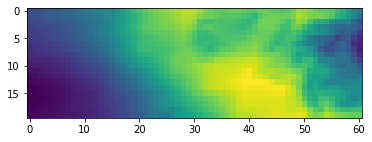

In [15]:
plt.imshow(HCHO_slant_col[0])

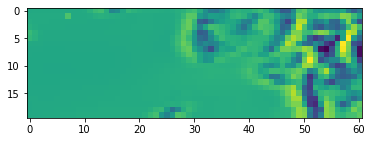

In [17]:
plt.imshow(O3_slant_col[0])

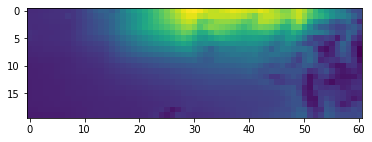

In [13]:
plt.imshow(NO2_slant_col[0])

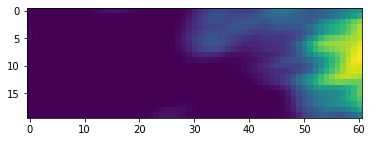

In [16]:
plt.imshow(terrain_height)

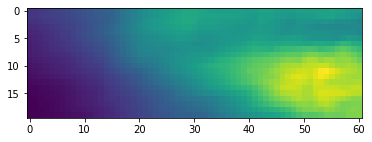

In [12]:
plt.imshow(GLYX_slant_col[0])

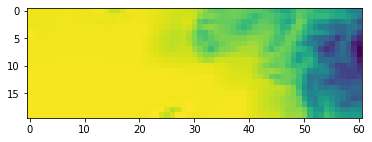

In [8]:
plt.imshow(surface_pressure)

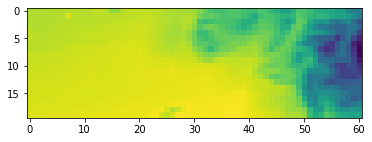

In [7]:
plt.imshow(O2_slant_col[0])

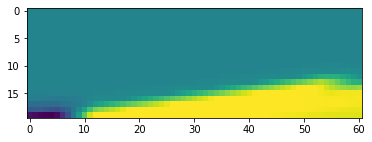

In [183]:
plt.imshow(tropopause_pressure)

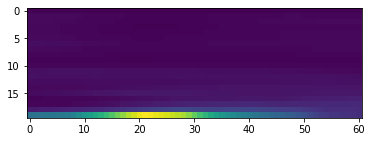

In [210]:
plt.imshow(SO2_slant_col[0])

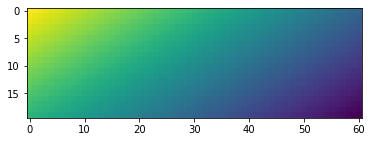

In [211]:
plt.imshow(relative_azimuth_angle)

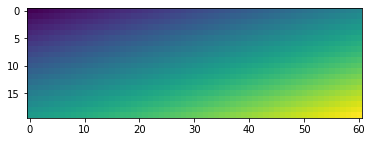

In [212]:
plt.imshow(solar_zenith_angle)

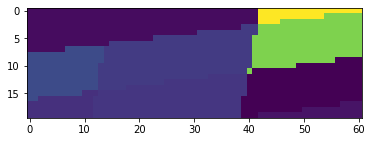

In [48]:
plt.imshow(albedo)

In [69]:
solar_zenith_angle.max()

30.466194

In [73]:
np.log(surface_pressure).max()

6.9127593

In [39]:
feature_map = np.stack((
    
                        np.deg2rad(solar_zenith_angle), #normal
                        np.deg2rad(viewing_zenith_angle), #normal
                        np.deg2rad(relative_azimuth_angle), #normal
                        surface_pressure,  #skewed
                        #transform_func(tropopause_pressure), #skewed
                        #terrain_height,   #skewed
                        albedo,  #skewed
                        
                       #transform_func(Ar_slant_col[0]), #skewed
                        #transform_func(BrO_slant_col[0]), #skewed
                        #transform_func(GLYX_slant_col[0]), #skewed
                        #transform_func(H2O_slant_col[0]), #skewed
                        #transform_func(HCHO_slant_col[0]), #skewed
                        #transform_func(N2_slant_col[0]), #skewe
                        #transform_func(NO2_slant_col[0]), #skewed
                        #transform_func(O2_slant_col[0]), #skewed
                        transform_func(O3_slant_col[0]), #skewed
                        #transform_func(SO2_slant_col[0]) #skewed
                        ), axis=-1)

In [242]:
feature_map.shape

(20, 61, 12)

In [243]:
feature_map[np.isnan(feature_map)]

masked_array(data=[],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [244]:
np.save('feature_map.npy', feature_map.filled(np.nan))

In [245]:
#pip install tqdm

In [17]:
import torch

In [247]:
feature_map

masked_array(
  data=[[[ 0.5075072 ,  0.8497164 ,  0.5863175 , ..., 57.34129   ,
          47.1342    , 32.90627   ],
         [ 0.5076834 ,  0.85005563,  0.5859585 , ..., 57.341167  ,
          47.13351   , 32.905453  ],
         [ 0.5078601 ,  0.85039526,  0.5855995 , ..., 57.34121   ,
          47.132946  , 32.893574  ],
         ...,
         [ 0.5181765 ,  0.8696946 ,  0.56562626, ..., 57.244373  ,
          47.101177  , 32.709724  ],
         [ 0.5183686 ,  0.8700446 ,  0.56527203, ..., 57.23533   ,
          47.08942   , 32.69929   ],
         [ 0.51856095,  0.87039477,  0.56491786, ..., 57.225033  ,
          47.075294  , 32.68509   ]],

        [[ 0.5081846 ,  0.8504134 ,  0.58573675, ..., 57.330273  ,
          45.341373  , 33.820187  ],
         [ 0.5083611 ,  0.8507529 ,  0.5853783 , ..., 57.330162  ,
          45.341427  , 33.817734  ],
         [ 0.5085376 ,  0.85109216,  0.5850202 , ..., 57.330204  ,
          45.341698  , 33.805294  ],
         ...,
         [ 0.5188614

In [248]:
feature_map.shape

(20, 61, 12)

In [13]:
import torch

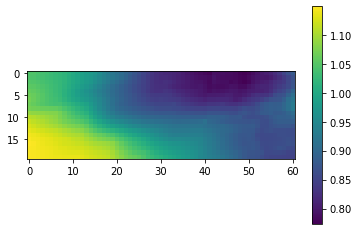

In [19]:
plt.imshow(HCHO_amf[0])
plt.colorbar()

In [69]:
feature_map.shape

(20, 61, 5)

In [40]:
training_examples = torch.from_numpy(feature_map.reshape(feature_map.shape[0] * feature_map.shape[1], feature_map.shape[2]))
HCHO_amf_labels = torch.from_numpy(HCHO_amf[0].reshape(HCHO_amf[0].shape[0] * HCHO_amf[0].shape[1]))

In [251]:
training_examples.shape

torch.Size([1220, 12])

In [252]:
HCHO_amf_labels.shape

torch.Size([1220])

In [41]:
from torch import utils

learning_data = utils.data.TensorDataset(training_examples, HCHO_amf_labels)

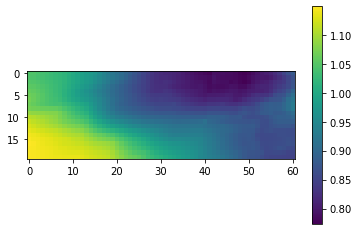

In [92]:
plt.imshow(learning_data.tensors[1].reshape(feature_map.shape[0], feature_map.shape[1]))
plt.colorbar()

In [77]:
learning_data.tensors[0]

tensor([[5.0751e-01, 8.4972e-01, 5.8632e-01, 3.5000e-02, 4.4473e+01],
        [5.0768e-01, 8.5006e-01, 5.8596e-01, 3.5000e-02, 4.4473e+01],
        [5.0786e-01, 8.5040e-01, 5.8560e-01, 3.5000e-02, 4.4473e+01],
        ...,
        [5.3135e-01, 8.8326e-01, 5.5531e-01, 3.6000e-02, 4.4484e+01],
        [5.3154e-01, 8.8362e-01, 5.5497e-01, 3.6000e-02, 4.4485e+01],
        [5.3174e-01, 8.8397e-01, 5.5462e-01, 3.6000e-02, 4.4490e+01]],
       dtype=torch.float64)

In [79]:
HCHO_amf[0]

masked_array(
  data=[[1.0450814 , 1.0450983 , 1.0411997 , ..., 0.8496789 , 0.8658302 ,
         0.878637  ],
        [1.0450863 , 1.0446106 , 1.0405581 , ..., 0.83714885, 0.8516038 ,
         0.8664649 ],
        [1.0482776 , 1.0478488 , 1.0440052 , ..., 0.8371913 , 0.85316426,
         0.8690702 ],
        ...,
        [1.1472667 , 1.1450647 , 1.1429967 , ..., 0.8655295 , 0.85975575,
         0.85754985],
        [1.1476446 , 1.145896  , 1.1442746 , ..., 0.8552436 , 0.8511301 ,
         0.85166895],
        [1.1465105 , 1.1449561 , 1.1435293 , ..., 0.8487586 , 0.8479241 ,
         0.8471286 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [78]:
learning_data.tensors[1]

tensor([1.0451, 1.0451, 1.0412,  ..., 0.8488, 0.8479, 0.8471])

In [16]:
train_set, test_set = torch.utils.data.random_split(learning_data, [int(len(learning_data) * 0.8), int(len(learning_data) * 0.2)])

In [256]:
train_set

In [257]:
torch.tensor(train_set.indices)

tensor([1027,   31,  320,  119, 1090,  108,  353,  443,  708,  833,   72,   81,
         414,   18,  695,   63,  132, 1032,  437,  957,  949,  942,    7, 1166,
        1128,  718, 1093,  221,  690,  598,   16,  534, 1123,  509,  207,  849,
         477,  660, 1145,  500,   25,  781, 1049,    8,  190,  894,  513,  591,
        1198, 1047,  415,  358,  516, 1189,  705,   96, 1006,  765,  389,  940,
        1008,  847,  809,  670,  919,  835,  456, 1174,  742,  370,  738,  181,
         203,  156,  768,  202,  772,  852,  946, 1037,  200,  560,  554,  424,
         827,  138,   74,  633,   20,  112,  910,  271,  326, 1107,  729,  154,
         923,   39, 1150,  972,  925,  977,  484,  439, 1068,  622,  136,  661,
         151,  837,  680,  995,  394, 1204,  515, 1103,  335,  349,  597,  233,
          13,  684,  407,  611,  468,  551,  607,  255,  347, 1000,   57,  688,
         297,   73,  629, 1199,  228, 1097,  139, 1044, 1002,  947,  717,   42,
         252, 1212,  111,  702,  559,  2

In [258]:
torch.index_select(learning_data.tensors[0], 0, torch.tensor(train_set.indices).to(torch.long))

tensor([[ 0.5279,  0.8786,  0.5593,  ..., 57.2751, 42.6358, 34.7170],
        [ 0.5131,  0.8603,  0.5752,  ..., 57.3325, 47.1182, 32.2097],
        [ 0.5136,  0.8583,  0.5781,  ..., 57.3320, 42.8524, 33.3256],
        ...,
        [ 0.5193,  0.8667,  0.5702,  ..., 57.3248, 42.8488, 33.0567],
        [ 0.5270,  0.8776,  0.5602,  ..., 57.2918, 42.6675, 34.5296],
        [ 0.5136,  0.8607,  0.5750,  ..., 57.3274, 45.3651, 33.1294]])

In [74]:
train_set = utils.data.TensorDataset(
    torch.index_select(learning_data.tensors[0], 0, torch.tensor(train_set.indices)),
    torch.index_select(learning_data.tensors[1], 0, torch.tensor(train_set.indices))
)

In [75]:
test_set = utils.data.TensorDataset(
    torch.index_select(learning_data.tensors[0], 0, torch.tensor(test_set.indices)),
    torch.index_select(learning_data.tensors[1], 0, torch.tensor(test_set.indices))
)

In [261]:
print(len(test_set))

244


In [58]:
pred_AMF.mean()

tensor(0.1178, grad_fn=<MeanBackward0>)

In [47]:
def evaluate_model(model, test_set, device=None):

    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    
    with torch.no_grad():
        x, y= learning_data.tensors[0].float().to(device), learning_data.tensors[1].float().to(device)

        pred_AMF = model(x)
        test_loss = torch.sqrt(F.mse_loss(torch.flatten(pred_AMF), y))

    plt.plot(np.arange(len(learning_data.tensors[0])), pred_AMF, color='red')
    plt.plot(np.arange(len(learning_data.tensors[0])), y, color='green')

    plt.imshow(pred_AMF.reshape(feature_map.shape[0], feature_map.shape[1]), vmin=0.5, vmax=1.5)
    plt.colorbar()
    plt.show()
    
    return test_loss


In [263]:
len(test_set.tensors[0])

244

In [88]:
learning_data.tensors[0]

tensor([[5.0751e-01, 8.4972e-01, 5.8632e-01, 3.5000e-02, 4.4473e+01],
        [5.0768e-01, 8.5006e-01, 5.8596e-01, 3.5000e-02, 4.4473e+01],
        [5.0786e-01, 8.5040e-01, 5.8560e-01, 3.5000e-02, 4.4473e+01],
        ...,
        [5.3135e-01, 8.8326e-01, 5.5531e-01, 3.6000e-02, 4.4484e+01],
        [5.3154e-01, 8.8362e-01, 5.5497e-01, 3.6000e-02, 4.4485e+01],
        [5.3174e-01, 8.8397e-01, 5.5462e-01, 3.6000e-02, 4.4490e+01]],
       dtype=torch.float64)

In [31]:
pip install wandb

  Using cached pathtools-0.1.2.tar.gz (11 kB)

  Using cached shortuuid-1.0.8-py3-none-any.whl (9.5 kB)
  Using cached promise-2.3.tar.gz (19 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached urllib3-1.26.9-py2.py3-none-any.whl (138 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=4c8f84f2ae1f263fadb4fcd95051db830f6a4247898a41e6641dbc96ee422c6c
  Stored in directory: c:\users\wasii\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=4ab02baa3bfbc2e807d8d10e66dcff4b320f4e0cf12f7b743215e95544acc4fc
  Stored in directory: c:\users\wasii\appdata\local\pip\cache\wheels\b7\0a\67\ada

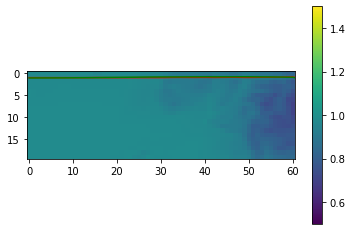

tensor(0.0864, grad_fn=<SqrtBackward0>) tensor(0.0075)



epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,12458
learning_rate,1e-05
train_loss,0.0864


In [54]:
import NN_layer
import torch.nn.functional as F

import tqdm
import wandb


run = wandb.init(project=f"tempo_ml_training")

max_epochs = 120000

device = 'cpu'

input_size = len(learning_data[0][0])

model = NN_layer.AMFNet(input_size, 10)
adamWOptim = torch.optim.AdamW(model.parameters(), lr=1e-5)

previous_loss = 0

epsilon = 1e-45

for epoch in range(max_epochs):

    x, y = learning_data.tensors[0].float().to(device), learning_data.tensors[1].float().to(device)
    pred_AMF = model(x)

    #print(model.fc1.weight)
    
    loss = torch.sqrt(F.mse_loss(torch.flatten(pred_AMF), y))

    if torch.abs(loss - previous_loss) < epsilon:
        break
    previous_loss = loss
    # zero out gradients
    adamWOptim.zero_grad() 
    # 4. Backpropagate the loss
    loss.backward()
    # 5. Update the parameters
    adamWOptim.step()

    wandb.log(
        {
            "train_loss": loss,
            "learning_rate": adamWOptim.param_groups[0]["lr"],
            "epoch": epoch,
        },
        step=epoch,
    )

    # if epoch % 200 == 0:
    #     print(loss)

    # if epoch > 10000 and (loss - previous_loss) <= 1e-20:
    #     break
    
    #previous_loss = loss


test_loss = evaluate_model(model, learning_data)

print(loss, test_loss)
run.finish()


In [80]:
np.sqrt(1.1693)

1.0813417591122614

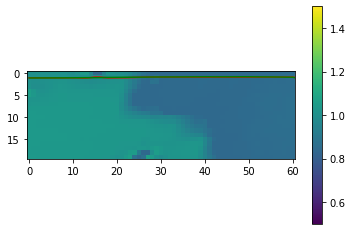

In [48]:
test_loss = evaluate_model(model, learning_data)

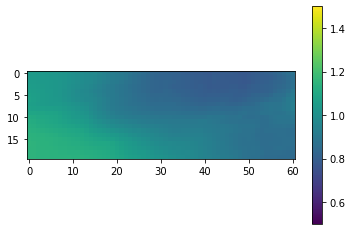

In [44]:
    plt.imshow(learning_data.tensors[1].reshape(feature_map.shape[0], feature_map.shape[1]), vmin=0.5, vmax=1.5)

    plt.colorbar()

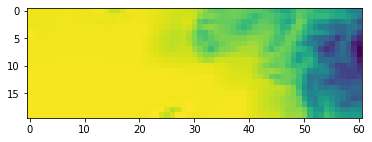

In [65]:
plt.imshow(surface_pressure)